# Household data (interactive analysis)
In this section it is possible to explore in detail where the survey has been implemented, and perform basic analysis on the collected data.

## Map View
The Map allows to visualize the location of the collected GPS data. Missing data points are displayed with coordinated *(0,0)*


In [14]:
import os,sys, folium, pandas
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 20})
odk_data_dir = '../../_datasets/DataODK/'


odk_folder_dir = 'HEDERA_SDG7/'
#odk_folder_dir = 'HEDERA_SDG7_19_07_05/'
## @brief name of the file (this should not be changed, it is set from ODK)
odk_data_name = 'HEDERA_SDG7_results.csv'

# initialize the institution
mfi = hedera.mfi(4)

# read database
data = mfi.read_survey(odk_data_dir+odk_folder_dir+odk_data_name,
                           delimiter='-')
mfi.HH = odk.households(data)

#Define initial geolocation
initial_location = [-0.2, 35.6]
map_osm = folium.Map(initial_location, zoom_start=10)
colors = {0: hedera.tier_color(0), 1 : hedera.tier_color(1), 2 : hedera.tier_color(2), 
          3 : hedera.tier_color(3), 4 : hedera.tier_color(4), 5: hedera.tier_color(5)}
mfi.HH.apply(lambda row:folium.CircleMarker(location=[row["GPS_Latitude"], row["GPS_Longitude"]],
                                        radius=10,fill_color=colors[row['E_Index']], 
                                        popup=' MTF Index: ' + str(row['E_Index'])).add_to(map_osm), axis=1)
map_osm

### Collection overview
Data have been collected in five different locations.

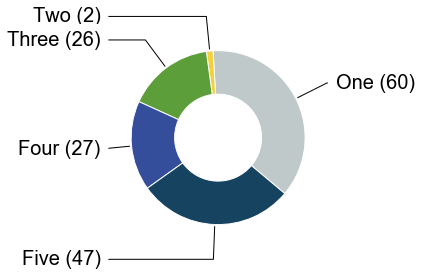

In [15]:
mfi.plot_collection_overview()

## Interactive Analysis
In this section it is possible to create different plots comparing the columns of the whole household database.

* Drag and drop each variable from the list on the left to the table on the right
* Select the type of plot/table


In [16]:
pivot_ui(mfi.HH, outfile='/Users/nataliarealpecarrillo/Documents/HEDERA/code/pepi/report-0/content/pivottablejs.html')